## Watershed

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Reading in Image

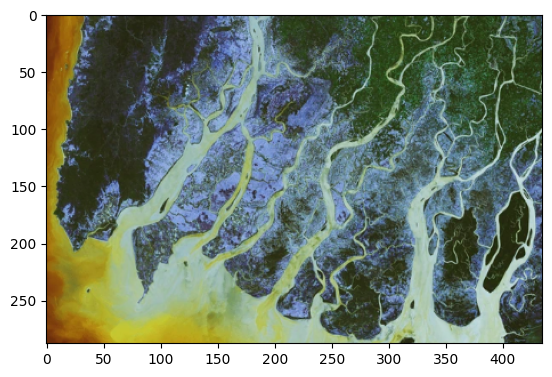

In [57]:
image = cv2.imread("wc.png")
plt.imshow(image)
plt.show()

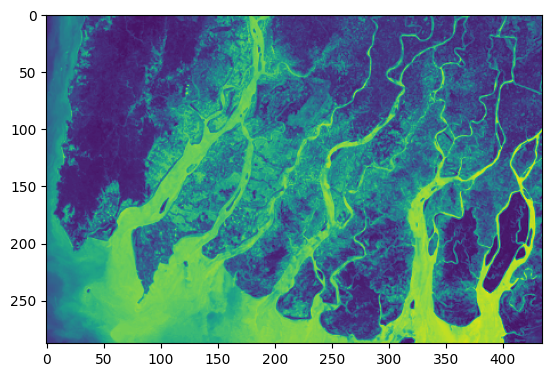

In [58]:
img_RGB =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray)
plt.show()

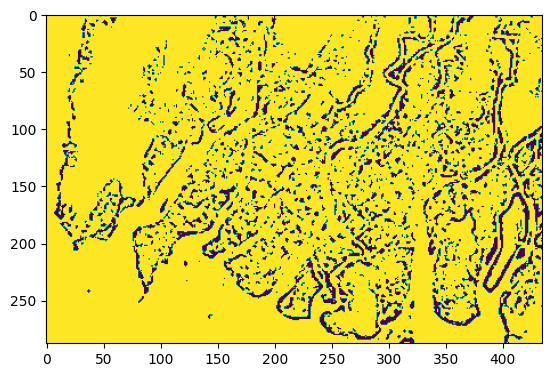

In [59]:
img1 =cv2.medianBlur(img_gray,3)
ath2 =cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,11)
plt.imshow(ath2)
plt.show()

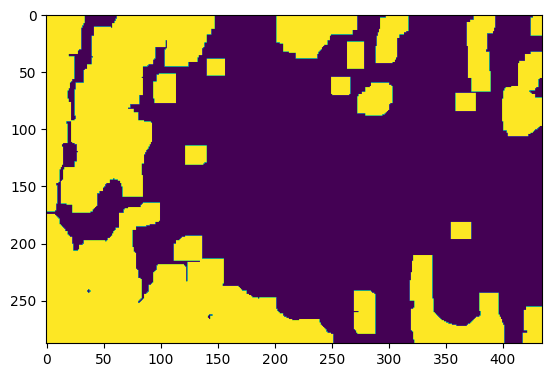

In [60]:
kernal = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(ath2,cv2.MORPH_OPEN,kernal, iterations = 7)
plt.imshow(opening)
plt.show()

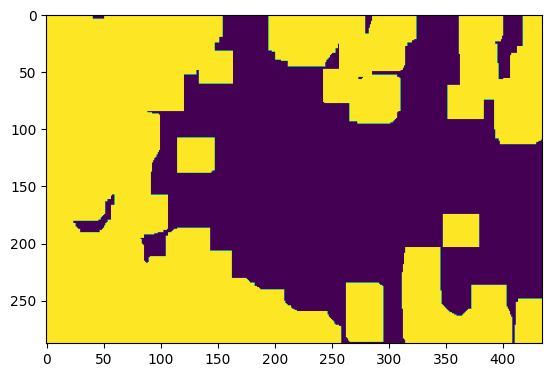

In [61]:
sure_bg = cv2.dilate(opening, kernal, iterations = 7)
plt.imshow(sure_bg)
plt.show()

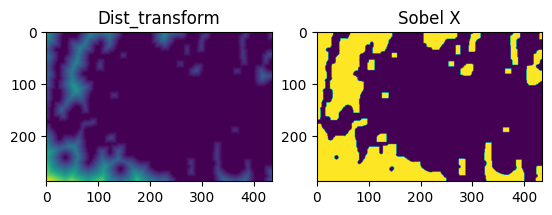

In [62]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 3)
plt.subplot(1, 2, 1), plt.imshow(dist_transform)
plt.title('Dist_transform')

ret, sure_fg = cv2.threshold(dist_transform, 0.05 * dist_transform.max(), 255, 0)
plt.subplot(1, 2, 2), plt.imshow(sure_fg)
plt.title('Sobel X')
plt.show()


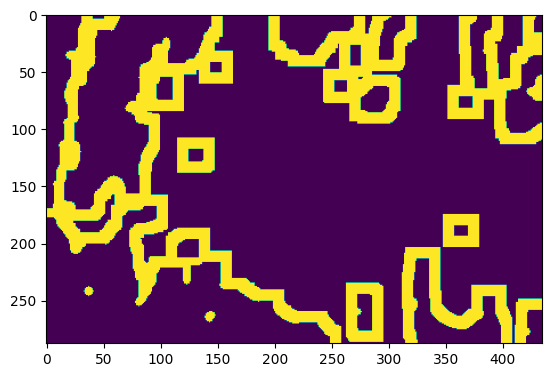

In [63]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
plt.imshow(unknown)
plt.show()

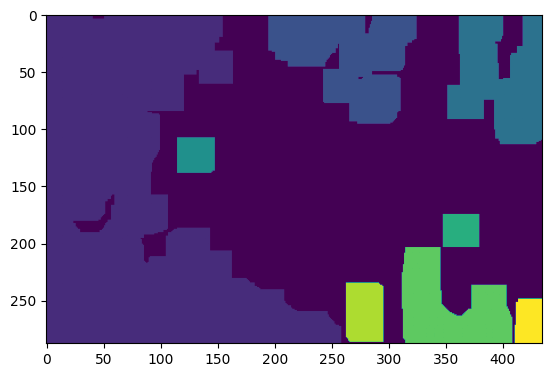

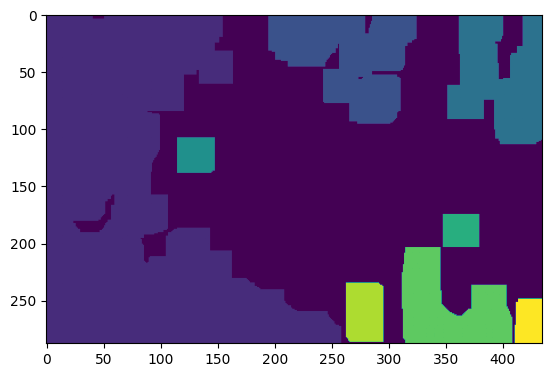

In [64]:
ret, markers = cv2.connectedComponents(sure_bg)
markers = markers + 1
plt.imshow(markers)
plt.show()
plt.imshow(markers)
plt.show()


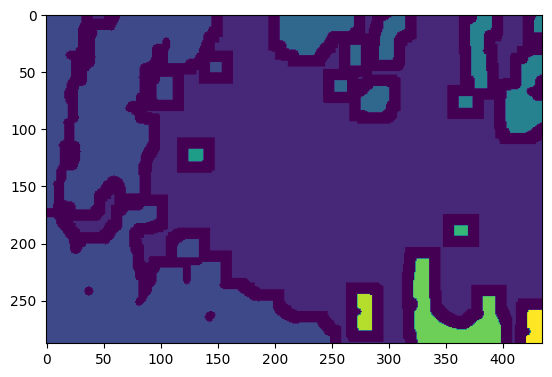

In [65]:
markers[unknown == 255] = 0
plt.imshow(markers)
plt.show()


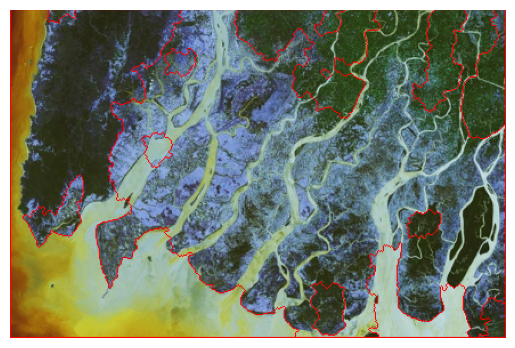

In [66]:
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]
plt.imshow(image)
plt.axis('off')
plt.show()
